In [1]:
from ast import literal_eval
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from  itertools import combinations

<h3> Data Cleaning </h3>

The following cell:  
- Reads data from the regions JSON file to determine the Category labels for each country.  
- Reads data from the regions CSV files
- Cleans the data to keep only the relevant fields
- Performs EDA in order to better organize the data

In [2]:
countries = ['CA', 'DE', 'FR', 'GB', 'IN', 'US', 'MX', 'KR', 'RU', 'JP']
category_dicts = {}
dfs = {}
regionwise_cateogry_counts = {}
for country in countries:
#     print("\n\n\nCOuntry:", country)
    json_data = 'Dataset/' + country + '_category_id.json'
#     print("Json File Name:", json_data)
    json_file = open(json_data, 'r')
    read_all = json_file.read()
    read_all = read_all.replace('true', 'True')
    read_all = read_all.replace('false', 'False')
    read_all = eval(read_all)

    items = read_all['items']
    category_dict = {}
    for kv_pairs in items:
        video_id = int(kv_pairs['id'])
        video_category = kv_pairs['snippet']['title']
        category_dict.update({video_id:video_category})
    category_dicts.update({country:category_dict})
    df_name = 'Dataset/' + country +'videos.csv'
    df_temp = pd.read_csv(df_name, usecols=['category_id', 'trending_date', 'likes', 'dislikes', 'views', 'comment_count'])
    dfs.update({country:df_temp})
    df_analysis = df_temp[['category_id', 'trending_date']]
    df_groupyby_category = df_analysis.groupby('category_id').count()['trending_date']
    count_by_category = {}
    for ids in category_dict:
        try: 
            count_by_category.update({category_dict[ids]:df_groupyby_category[ids]})
        except KeyError:
            continue
    
    regionwise_cateogry_counts.update({country:count_by_category})
regionwise_cateogry_counts

{'CA': {'Film & Animation': 2060,
  'Autos & Vehicles': 353,
  'Music': 3731,
  'Pets & Animals': 369,
  'Sports': 2787,
  'Travel & Events': 392,
  'Gaming': 1344,
  'People & Blogs': 4105,
  'Comedy': 3773,
  'Entertainment': 13451,
  'News & Politics': 4159,
  'Howto & Style': 2007,
  'Education': 991,
  'Science & Technology': 1155,
  'Movies': 6,
  'Shows': 124},
 'DE': {'Film & Animation': 2376,
  'Autos & Vehicles': 873,
  'Music': 2372,
  'Pets & Animals': 251,
  'Sports': 2752,
  'Travel & Events': 141,
  'Gaming': 1565,
  'People & Blogs': 5988,
  'Comedy': 2534,
  'Entertainment': 15292,
  'News & Politics': 2935,
  'Howto & Style': 1745,
  'Education': 844,
  'Science & Technology': 806,
  'Movies': 2,
  'Shows': 107,
  'Trailers': 1},
 'FR': {'Film & Animation': 2157,
  'Autos & Vehicles': 673,
  'Music': 3946,
  'Pets & Animals': 237,
  'Sports': 4342,
  'Travel & Events': 119,
  'Gaming': 1459,
  'People & Blogs': 5719,
  'Comedy': 4343,
  'Entertainment': 9819,
  'News 

<h5>Objective 1</h5>
Once we have cleaned and organized the data, we first try to answer the basic question. <b>Which genres are propular in which regions?</b>

In [3]:
df = pd.DataFrame(regionwise_cateogry_counts)
df.drop(axis = 0, labels=['Nonprofits & Activism', 'Trailers', 'Movies'], inplace = True)
df.fillna(0, inplace = True)
df = df.astype(int)
df_percentages = (100. * df / df.sum()).round(1)
df.reset_index(inplace = True)
df = df.rename(columns = {'index':'category'})
df_percentages.reset_index(inplace = True)
df_percentages = df_percentages.rename(columns = {'index':'category'})
df_percentages

,category,CA,DE,FR,GB,IN,US,MX,KR,RU,JP
0,Film & Animation,5.0,5.9,5.3,6.6,4.5,5.7,3.2,6.4,7.8,5.9
1,Autos & Vehicles,0.9,2.2,1.7,0.4,0.2,0.9,0.6,0.4,4.0,1.4
2,Music,9.1,5.8,9.7,35.4,10.4,15.8,8.4,5.3,4.8,6.3
3,Pets & Animals,0.9,0.6,0.6,1.4,0.0,2.2,0.2,2.1,1.5,5.5
4,Sports,6.8,6.8,10.7,4.9,2.0,5.3,10.1,2.7,5.0,9.9
5,Travel & Events,1.0,0.3,0.3,0.2,0.0,1.0,0.3,0.3,0.7,0.7
6,Gaming,3.3,3.9,3.6,4.6,0.2,2.0,2.5,4.1,2.7,5.0
7,People & Blogs,10.1,14.8,14.1,7.5,7.0,7.8,20.3,20.6,26.4,19.1
8,Comedy,9.2,6.2,10.7,4.7,9.2,8.5,4.3,6.0,7.8,3.6
9,Entertainment,33.0,37.7,24.2,23.5,44.9,24.4,33.6,26.1,15.2,30.5


<ipython-input-4-842d32475c9a>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels = [0,10,20,30,40], fontsize = 24)


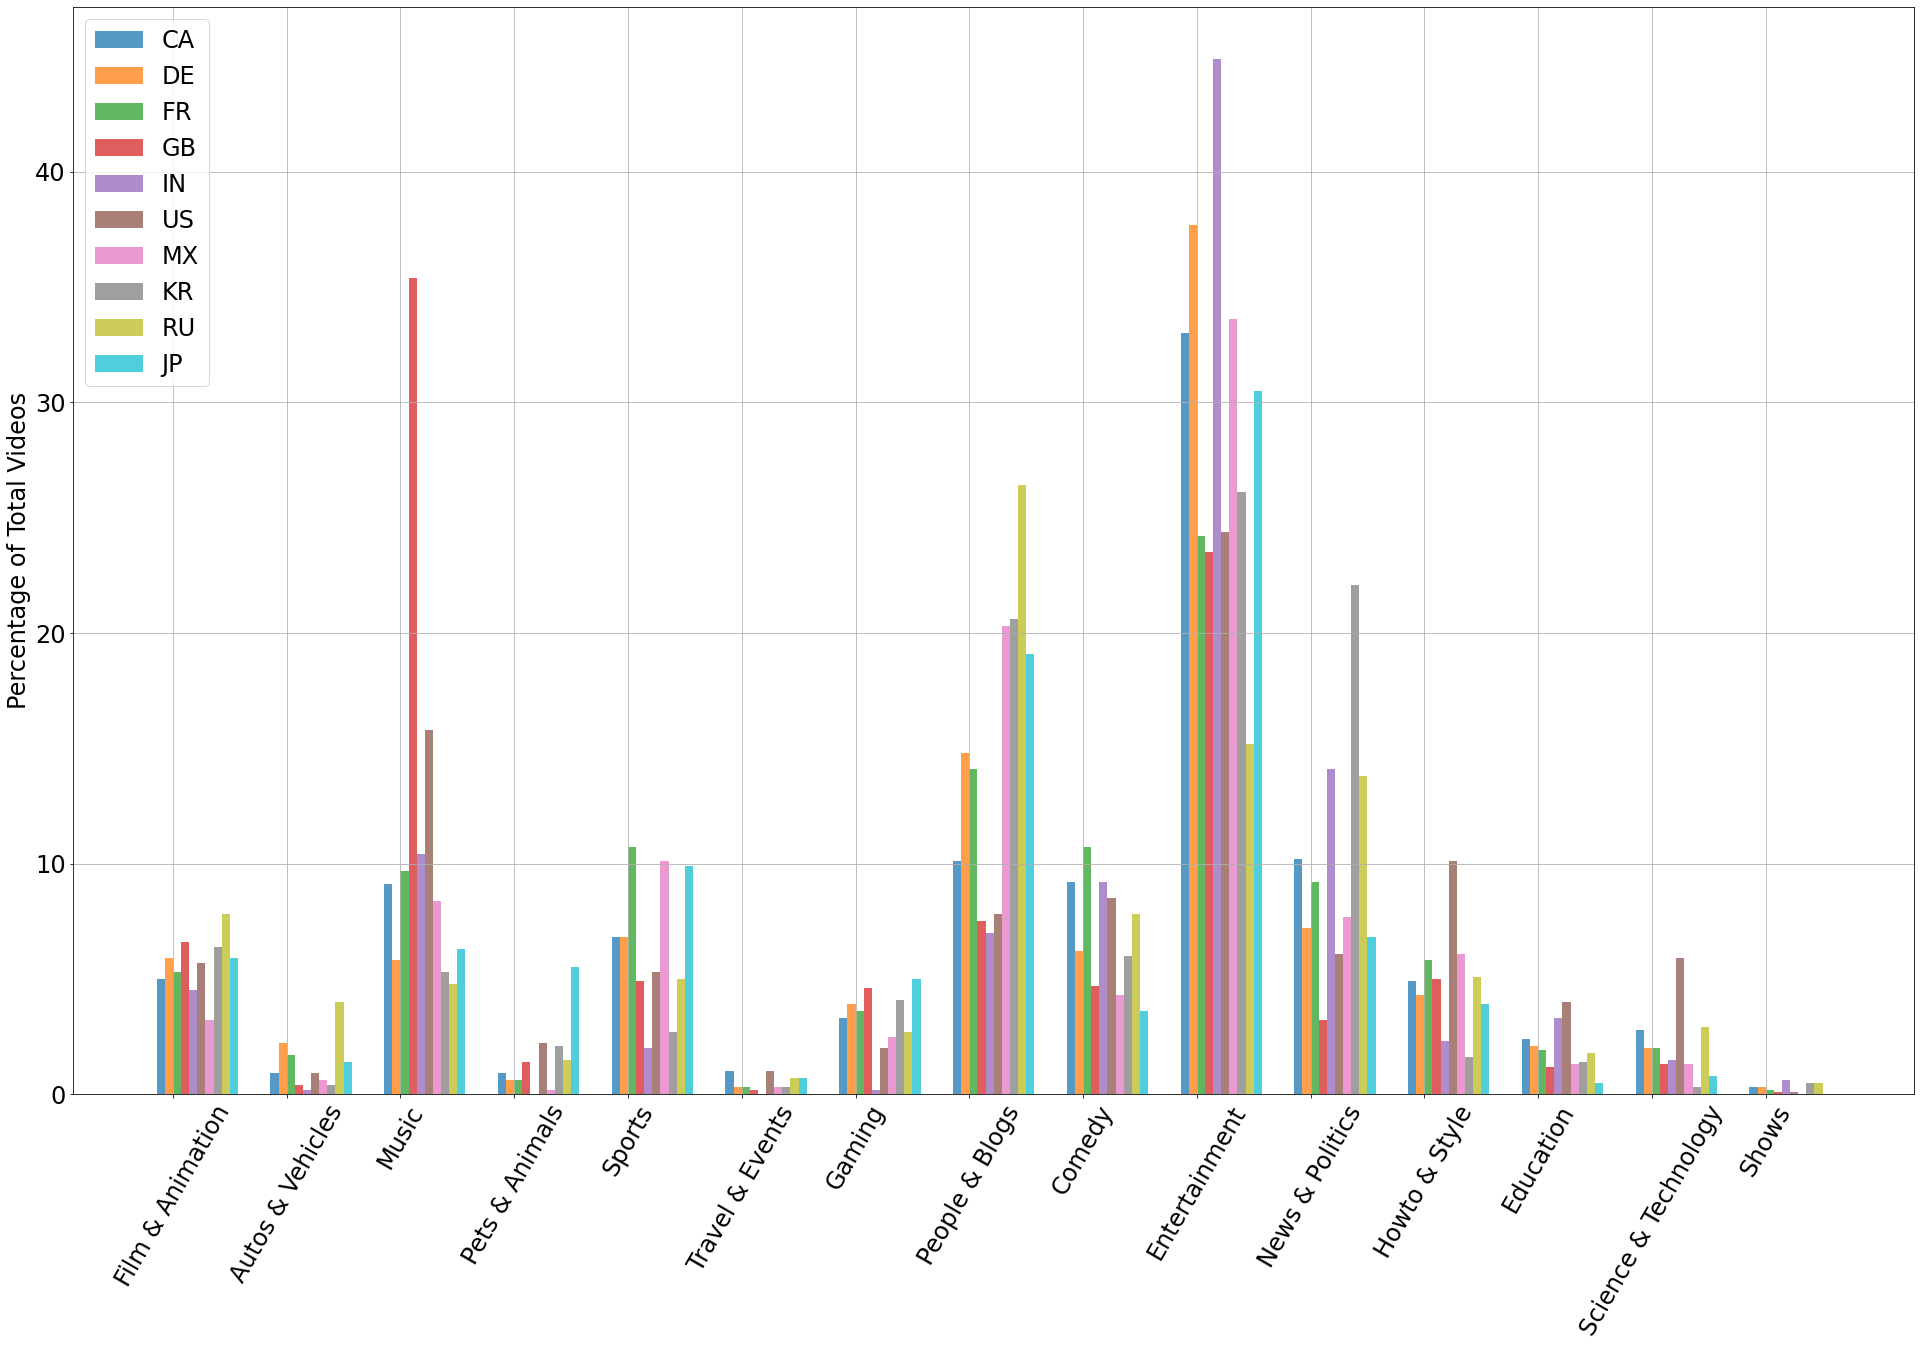

<Figure size 432x288 with 0 Axes>

In [4]:
pos = []
width = 0.5
k = 7
for i in range(len(df_percentages['CA'])):
    pos.append(i*k)
fig, ax = plt.subplots(figsize=(33,20))

i = 0
for country in countries:
#     print(country)
#     print([p + width*i for p in pos])
    plt.bar([p + width*i for p in pos], df_percentages[country], width, alpha=0.75)
    i+=1

ax.set_ylabel('Percentage of Total Videos', fontsize = 24)

ax.set_xticks([p + 1.5 * width for p in pos])

ax.set_xticklabels(df_percentages['category'], rotation = 60, fontsize = 24)
ax.set_yticklabels(labels = [0,10,20,30,40], fontsize = 24)

plt.legend(countries, loc='upper left', fontsize = 24)
plt.grid()
plt.show()
plt.savefig('bird.png', dpi=300)

From the above figure, we can draw some initial conclusions regarding Cross-Regional Preferences:  
- It is evident that trending videos usually consist of video belonging to Entertainment category, which implies that YouTube is generally used for Entertainment purposes, though it is too early categorize this as a Causal Relationship.  - We also see some anomolous behaviors in particular regions such as Britian, where the trending data suggests that YouTube is widely used as a Music Streaming service, since Music videos make up more than 35% of the total Trending videos
- In Korea, Trending videos suggest that during (approximately) the first half of 2018, YouTube was popularly used as a means of News consumption.

<h5> Understanding the Anomolous behaviors</h5>

In the following cells, we try to understand the possible reasons for these anomolous behaviors and what might have caused the YouTube Trending videos to be influenced by them.


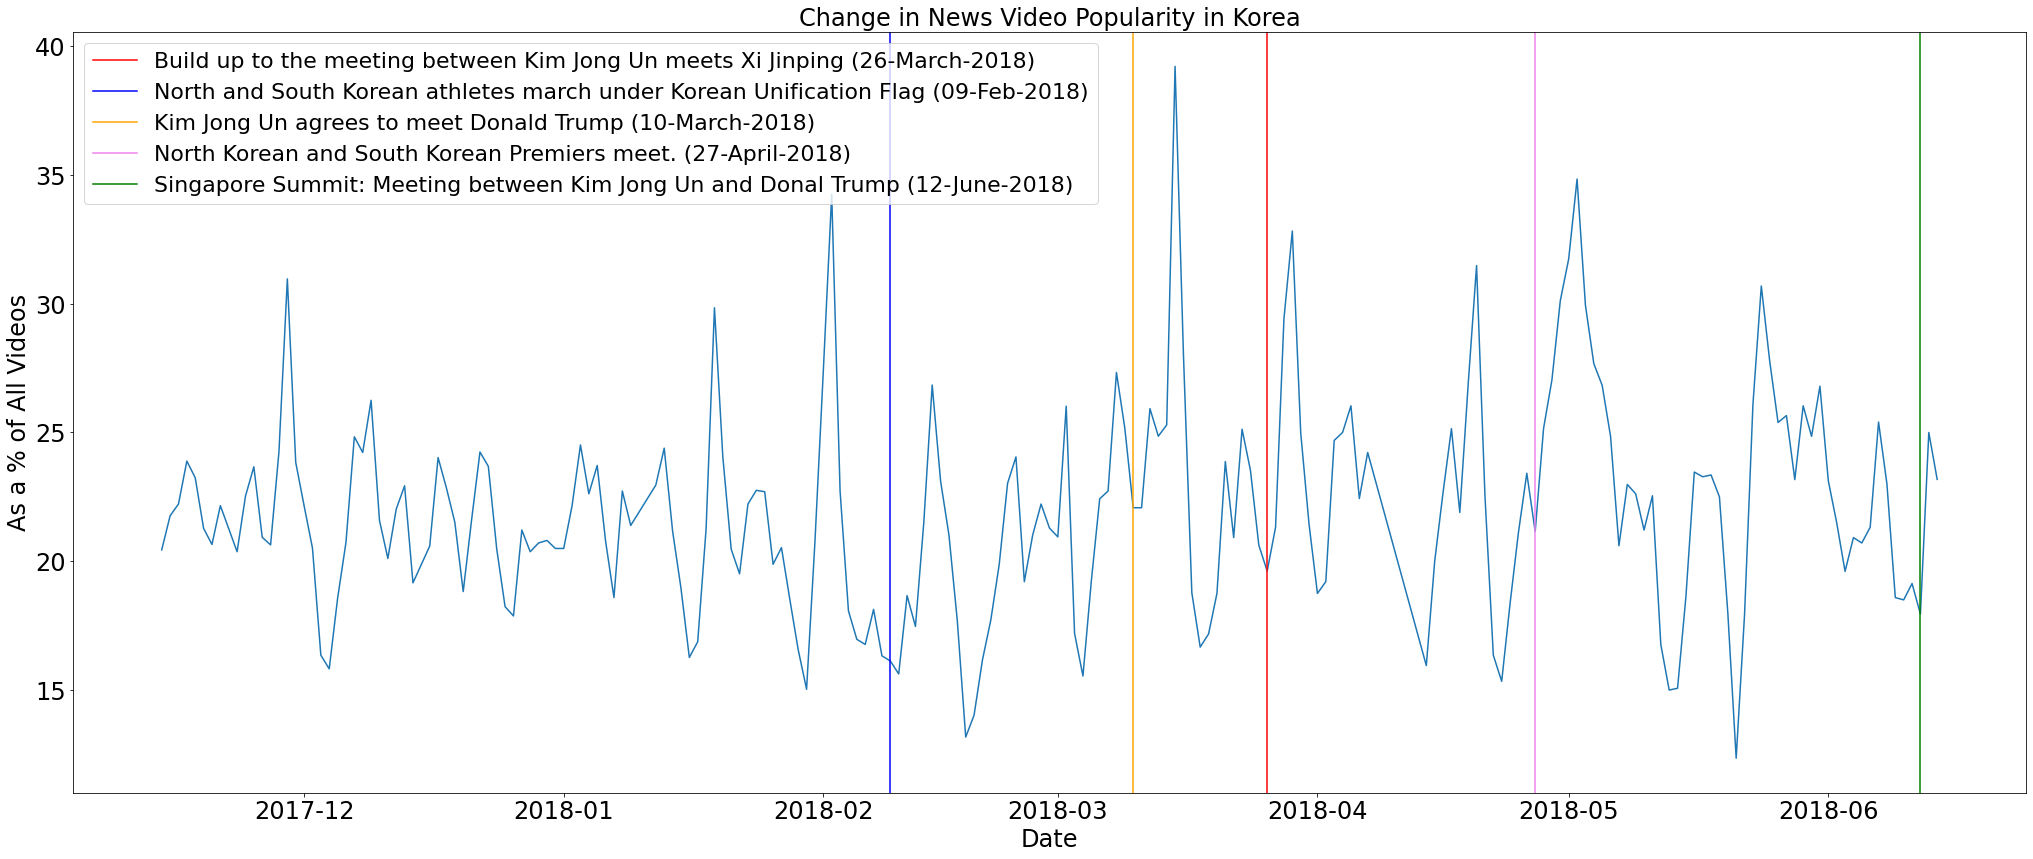

In [5]:
df_korea = dfs['KR']
# Converting Dates to DateTime Objects
df_korea['trending_date'] = pd.to_datetime(pd.Series(df_korea['trending_date']), format="%y.%d.%m") 
videos_per_date_korea = df_korea.groupby('trending_date').count()

df_news_korea = df_korea[df_korea['category_id'] == 25]
news_videos_per_date_korea = df_news_korea.groupby('trending_date').count()
news_videos_per_date_korea = (100. * news_videos_per_date_korea / videos_per_date_korea.round(1))
news_videos_per_date_korea

plt.figure(figsize=(35,14))
plt.plot(news_videos_per_date_korea.index, news_videos_per_date_korea['category_id'])
plt.title('Change in News Video Popularity in Korea', fontsize = 24)
plt.xticks(fontsize = 24)
plt.xlabel("Date", fontsize = 24)
plt.yticks(fontsize = 24)
plt.ylabel('As a % of All Videos',fontsize = 24)

plt.axvline(x = datetime.strptime('2018.03.26', '%Y.%m.%d'), label = 'Build up to the meeting between Kim Jong Un meets Xi Jinping (26-March-2018)', c= 'red')
plt.axvline(x = datetime.strptime('2018.02.09', '%Y.%m.%d'), label = 'North and South Korean athletes march under Korean Unification Flag (09-Feb-2018)', c= 'blue')
plt.axvline(x = datetime.strptime('2018.03.10', '%Y.%m.%d'), label = 'Kim Jong Un agrees to meet Donald Trump (10-March-2018)', c= 'orange')
plt.axvline(x = datetime.strptime('2018.04.27', '%Y.%m.%d'), label = 'North Korean and South Korean Premiers meet. (27-April-2018)', c= 'violet')
plt.axvline(x = datetime.strptime('2018.06.12', '%Y.%m.%d'), label = 'Singapore Summit: Meeting between Kim Jong Un and Donal Trump (12-June-2018)', c= 'green')
plt.legend(fontsize = 22)
plt.savefig('image_name.png', dpi=300)

plt.show()


As we can see from the figure above, there seems to be an accossiation between a real world political event and cconsumption of politiical videos on YouTube.  
But still the data is too crude to call this accossiation a causal one, since the data does not inform us about confounding factors such as the fact that people might only have used YouTube since some of the content was censored on National Television, etc.

To analyze this further, we consider the question:  
<h5> Do real-life events have any accossiation with YouTube Trending videos? </h5>

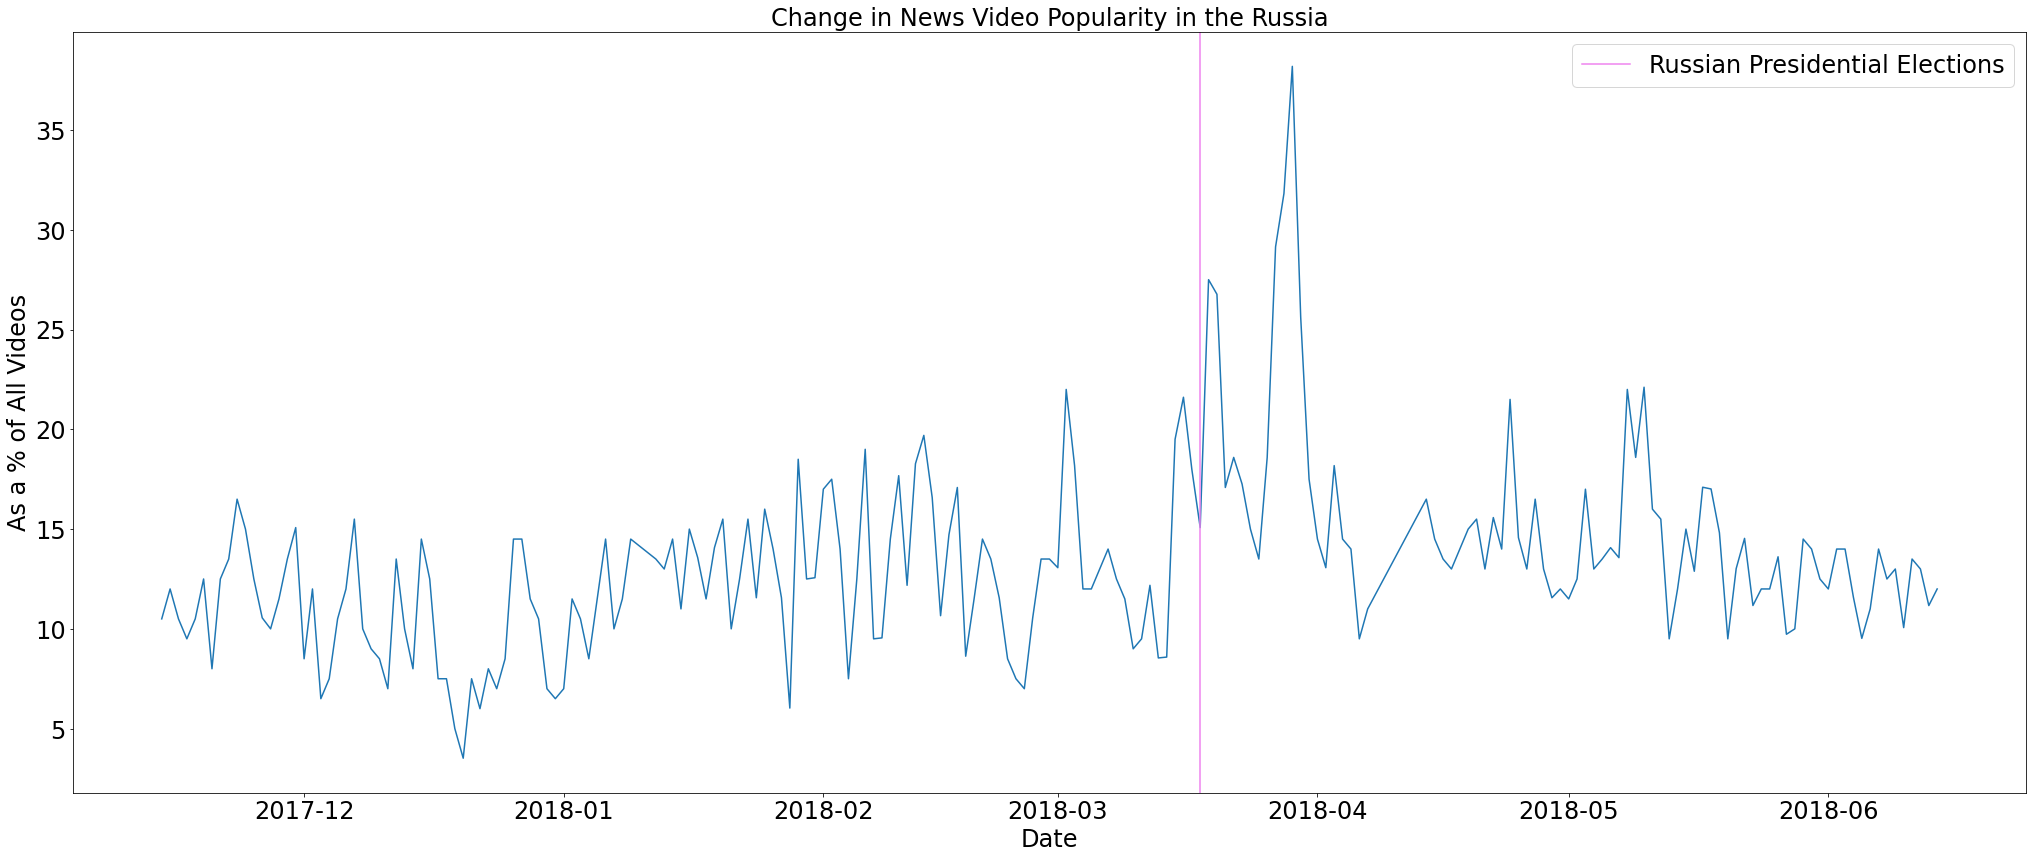

<Figure size 432x288 with 0 Axes>

In [6]:
df_russia = dfs['RU']
# Converting Dates to DateTime Objects
df_russia['trending_date'] = pd.to_datetime(pd.Series(df_russia['trending_date']), format="%y.%d.%m") 
videos_per_date_russia = df_russia.groupby('trending_date').count()
category_dicts['RU']

df_news_russia = df_russia[df_russia['category_id'] == 25]
news_videos_per_date_russia = df_news_russia.groupby('trending_date').count()
news_videos_per_date_russia = (100. * news_videos_per_date_russia / videos_per_date_russia.round(1))
news_videos_per_date_russia

plt.figure(figsize=(35,14))
plt.plot(news_videos_per_date_russia.index, news_videos_per_date_russia['category_id'])
plt.title('Change in News Video Popularity in the Russia', fontsize = 24)
plt.xticks(fontsize = 24)
plt.xlabel("Date", fontsize = 24)
plt.yticks(fontsize = 24)
plt.ylabel('As a % of All Videos',fontsize = 24)

plt.axvline(x = datetime.strptime('2018.03.18', '%Y.%m.%d'), label = 'Russian Presidential Elections', c= 'violet')
plt.legend(fontsize = 24)
plt.show()
plt.savefig('russia.png', dpi=300)

Once again, in the case of Russia, we see a strong accossiation between a real-world event and YouTube trending being effected accordingly. There is a significant spike in the consumption of politiical content, as the Russian Presidentail Election draw near.

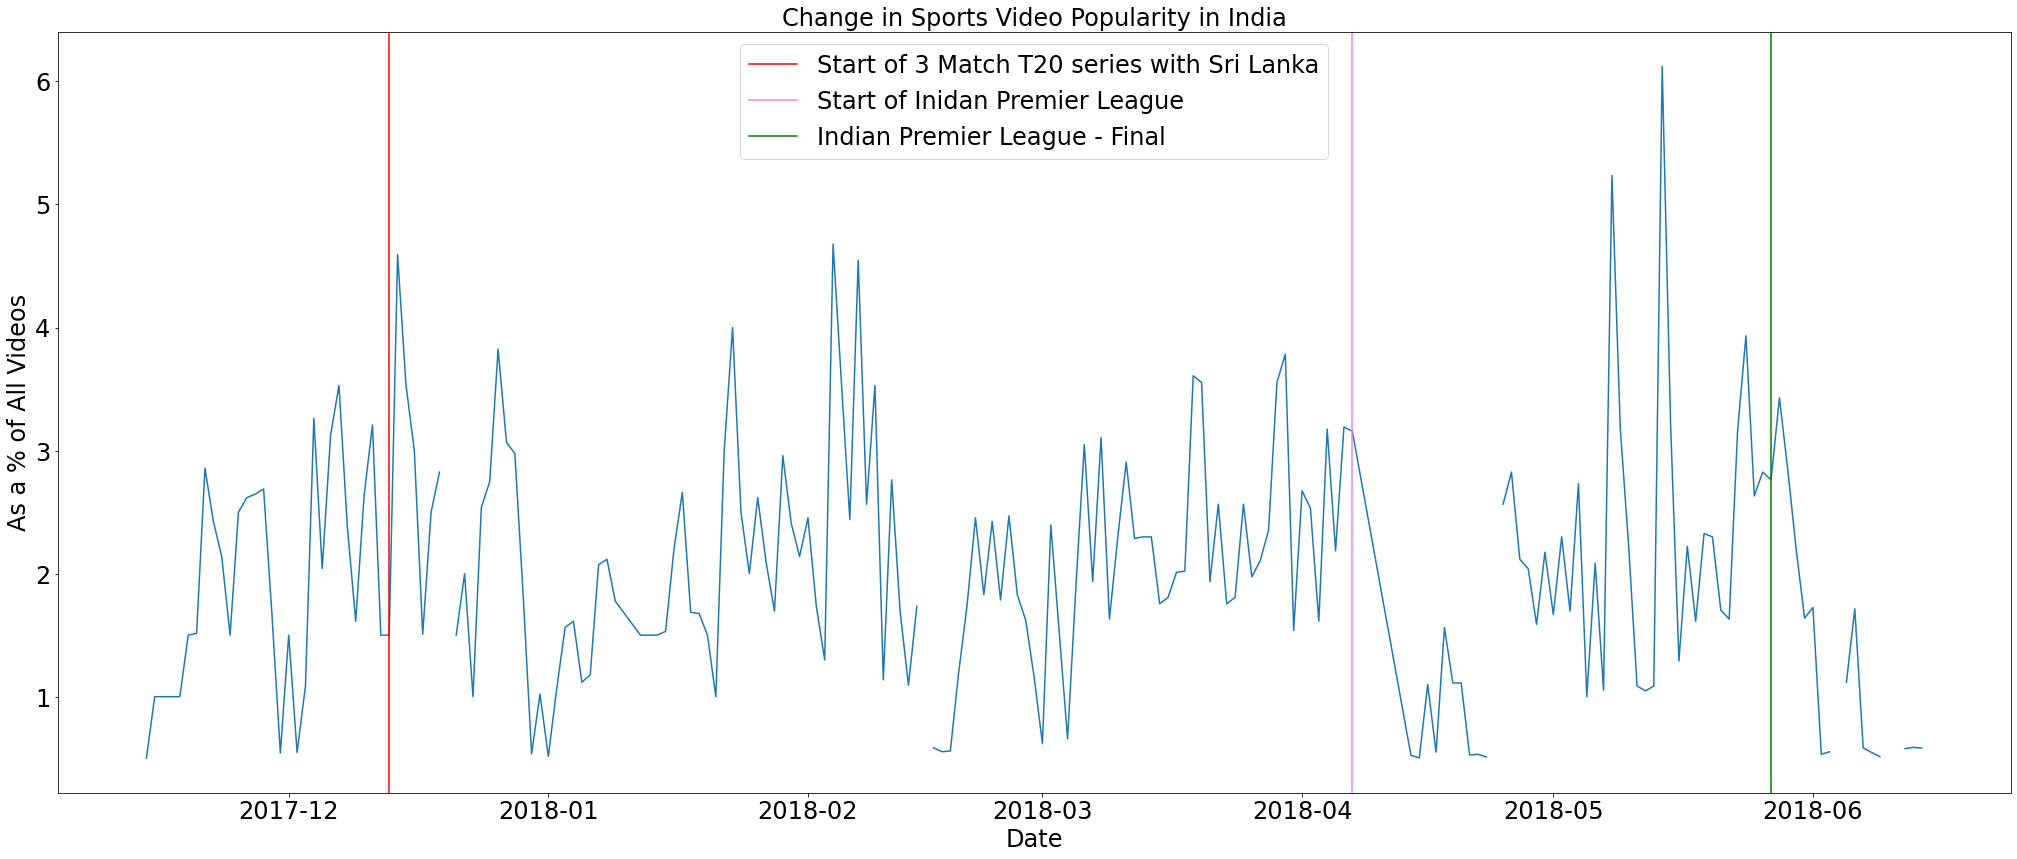

In [7]:
df_india = dfs['IN']
# Converting Dates to DateTime Objects
df_india['trending_date'] = pd.to_datetime(pd.Series(df_india['trending_date']), format="%y.%d.%m") 
videos_per_date_india = df_india.groupby('trending_date').count()

df_sports_india = df_india[df_india['category_id'] == 17]
sports_videos_per_date_india = df_sports_india.groupby('trending_date').count()
sports_videos_per_date_india = (100. * sports_videos_per_date_india / videos_per_date_india.round(1))
sports_videos_per_date_india

plt.figure(figsize=(35,14))
plt.plot(sports_videos_per_date_india.index, sports_videos_per_date_india['category_id'])
plt.title('Change in Sports Video Popularity in India', fontsize = 24)
plt.xticks(fontsize = 24)
plt.xlabel("Date", fontsize = 24)
plt.yticks(fontsize = 24)
plt.ylabel('As a % of All Videos',fontsize = 24)

plt.axvline(x = datetime.strptime('2017.12.13', '%Y.%m.%d'), label = 'Start of 3 Match T20 series with Sri Lanka', c= 'red')
plt.axvline(x = datetime.strptime('2018.04.07', '%Y.%m.%d'), label = 'Start of Inidan Premier League', c= 'violet')
plt.axvline(x = datetime.strptime('2018.05.27', '%Y.%m.%d'), label = 'Indian Premier League - Final', c= 'Green')
plt.legend(fontsize = 24)
plt.savefig('india.png', dpi=300)

plt.show()




Once again, we see a some correlation between real-life events and Trending videos on YouTube India. Around some major sporting events, there seems to be an uptick in the percentage of sports videos in the Trending section of YouTube.  

But at the same time, for other events, we do not see any significant uptick. This implies that the accossiation between real-world events and YouTube trending videos might not be a causal one. But instead may be influenced by a variety of factors, such as if people were able to follow the events on live television, their demand would be somewhat diminished from YouTube.

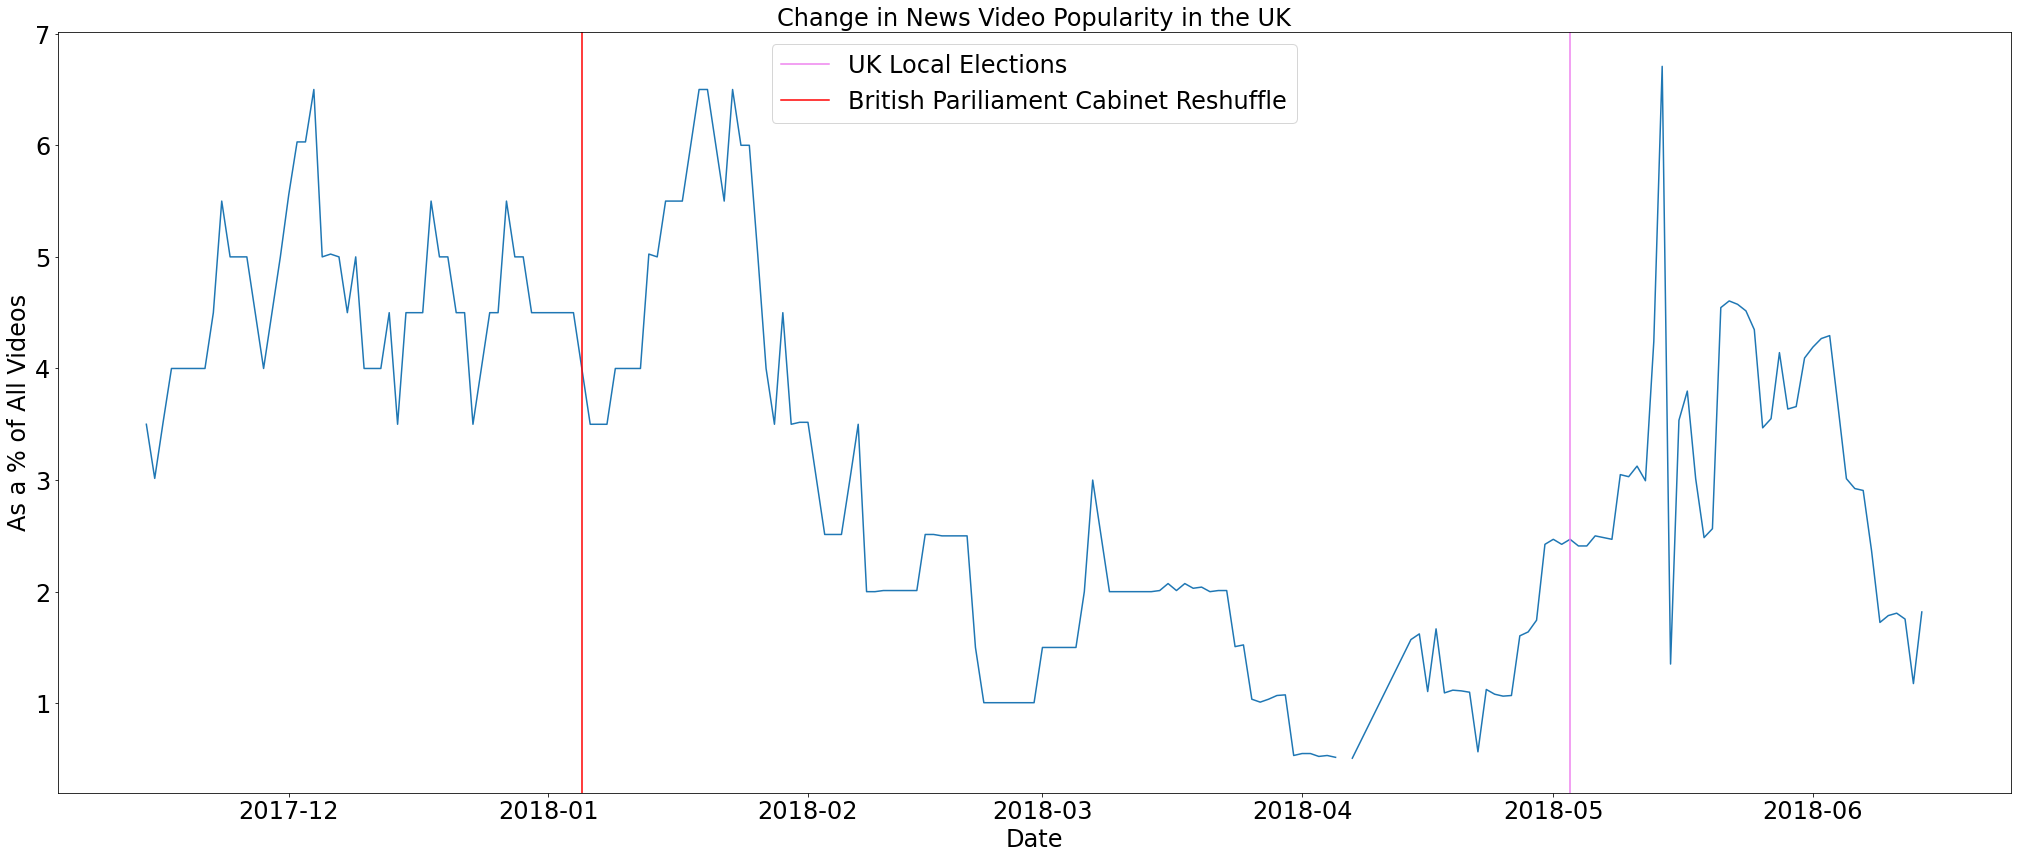

In [8]:
df_uk = dfs['GB']
# Converting Dates to DateTime Objects
df_uk['trending_date'] = pd.to_datetime(pd.Series(df_uk['trending_date']), format="%y.%d.%m") 
videos_per_date_uk = df_uk.groupby('trending_date').count()
category_dicts['GB']

df_news_uk = df_uk[df_uk['category_id'] == 25]
news_videos_per_date_uk = df_news_uk.groupby('trending_date').count()
news_videos_per_date_uk = (100. * news_videos_per_date_uk / videos_per_date_uk.round(1))
news_videos_per_date_uk

plt.figure(figsize=(35,14))
plt.plot(news_videos_per_date_uk.index, news_videos_per_date_uk['category_id'])
plt.title('Change in News Video Popularity in the UK', fontsize = 24)
plt.xticks(fontsize = 24)
plt.xlabel("Date", fontsize = 24)
plt.yticks(fontsize = 24)
plt.ylabel('As a % of All Videos',fontsize = 24)

plt.axvline(x = datetime.strptime('2018.05.03', '%Y.%m.%d'), label = 'UK Local Elections', c= 'violet')
plt.axvline(x = datetime.strptime('2018.01.05', '%Y.%m.%d'), label = 'British Pariliament Cabinet Reshuffle', c= 'red')
plt.legend(fontsize = 24)


plt.show()




To further reiterate the point mentioned in the last cell, we analyze the video consumption of political content in the United Kingdom. Following 2 major politiical events, the uptick in the Political section was somewhat delayed. The spike came after almost 10 days of the actual event happening. This is further evidence for the fact that there is not a definitive accossiation between real-world events and YouTube Trending videos.

<h6> Understanding the broken graphs:   </h6>

The broken segments of the graph indicate that there is no data available for that category on the given date, in the dataset. Which essentially means that no video from that category made it to the YouTube trending list on that day.

<h4> Cultural Associations </h4>

We try to understand that whether YouTube trending data can be an indicator of the cutural/regional preferences of the people. For this we will consider the overall consumption of content from a particular category over the given period.

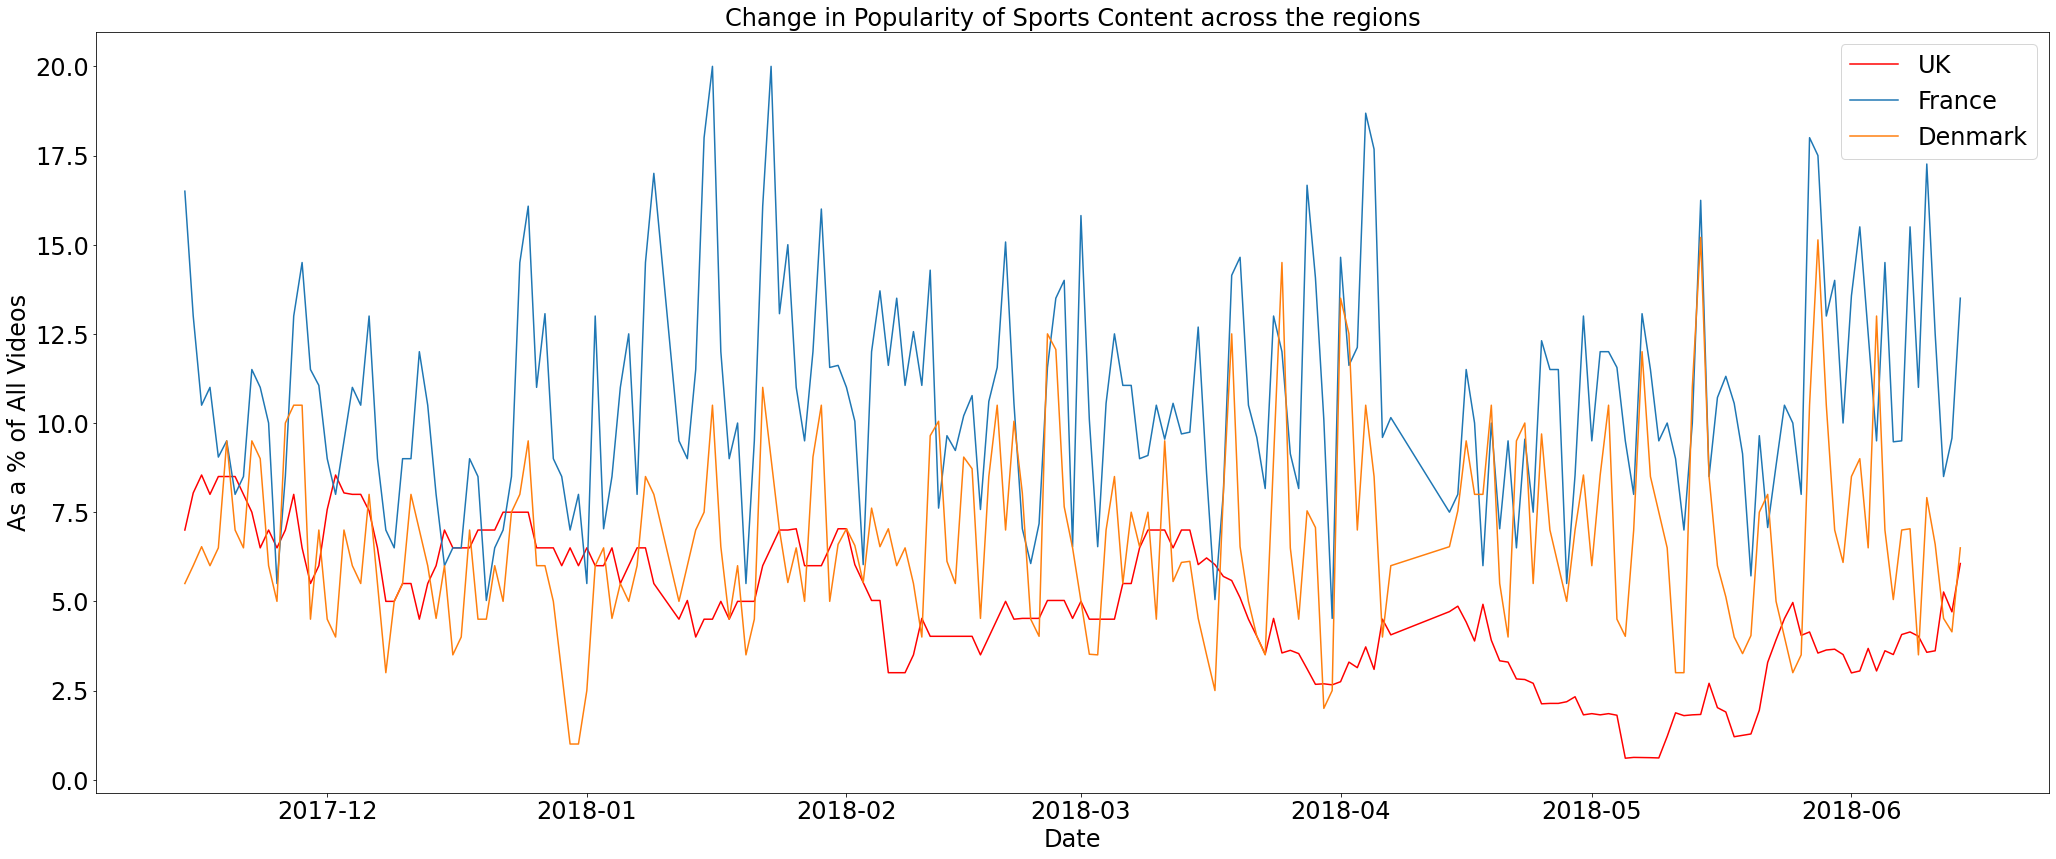

In [9]:
category_dicts['GB']

df_sports_uk = df_uk[df_uk['category_id'] == 17]
sports_videos_per_date_uk = df_sports_uk.groupby('trending_date').count()
sports_videos_per_date_uk = (100. * sports_videos_per_date_uk / videos_per_date_uk.round(1))
sports_videos_per_date_uk

plt.figure(figsize=(35,14))
plt.plot(sports_videos_per_date_uk.index, sports_videos_per_date_uk['category_id'], color = 'red', label = 'UK')
plt.title('Change in Popularity of Sports Content across the regions', fontsize = 24)
plt.xticks(fontsize = 24)
plt.xlabel("Date", fontsize = 24)
plt.yticks(fontsize = 24)
plt.ylabel('As a % of All Videos',fontsize = 24)


df_france = dfs['FR']
# Converting Dates to DateTime Objects
df_france['trending_date'] = pd.to_datetime(pd.Series(df_france['trending_date']), format="%y.%d.%m") 
videos_per_date_france = df_france.groupby('trending_date').count()

df_sports_france = df_france[df_france['category_id'] == 17]
sports_videos_per_date_france = df_sports_france.groupby('trending_date').count()
sports_videos_per_date_france = (100. * sports_videos_per_date_france / videos_per_date_france.round(1))
sports_videos_per_date_france
plt.plot(sports_videos_per_date_france.index, sports_videos_per_date_france['category_id'], label = 'France')
plt.legend(fontsize = 24)



# df_france = dfs['FR']
# # Converting Dates to DateTime Objects
# df_france['trending_date'] = pd.to_datetime(pd.Series(df_france['trending_date']), format="%y.%d.%m") 
# videos_per_date_france = df_france.groupby('trending_date').count()

# df_sports_france = df_france[df_france['category_id'] == 17]
# sports_videos_per_date_france = df_sports_france.groupby('trending_date').count()
# sports_videos_per_date_france = (100. * sports_videos_per_date_france / videos_per_date_france.round(1))
# sports_videos_per_date_france
# plt.plot(sports_videos_per_date_france.index, sports_videos_per_date_france['category_id'], label = 'France')

df_denmark = dfs['DE']
# Converting Dates to DateTime Objects
df_denmark['trending_date'] = pd.to_datetime(pd.Series(df_denmark['trending_date']), format="%y.%d.%m") 
videos_per_date_denmark = df_denmark.groupby('trending_date').count()

df_sports_denmark = df_denmark[df_denmark['category_id'] == 17]
sports_videos_per_date_denmark = df_sports_denmark.groupby('trending_date').count()
sports_videos_per_date_denmark = (100. * sports_videos_per_date_denmark / videos_per_date_denmark.round(1))
sports_videos_per_date_denmark
plt.plot(sports_videos_per_date_denmark.index, sports_videos_per_date_denmark['category_id'], label = 'Denmark')
plt.legend(fontsize = 24)

plt.savefig('sportscomparison.png', dpi=300)

plt.show()


# plt.axvline(x = datetime.strptime('2018.05.03', '%Y.%m.%d'), label = 'UK Local Elections', c= 'violet')
# plt.axvline(x = datetime.strptime('2018.01.05', '%Y.%m.%d'), label = 'British Pariliament Cabinet Reshuffle', c= 'red')
# plt.legend(fontsize = 20)
# plt.show()


From the above plot, we can observe that the data suggests, that in the UK sports content makes up only a small percentage of the Trending videos section, while in France and Denmark, sports content makes up a big chunk of the YouTube trending data. This stands in striking contrast to the ground realities, since Sports of all forms, especially Football and Cricket are extremely popular in the UK. They have a year long Premier League, which is a football tournament, and the English Cricket Team, has a very active international fixture schedule. Hence, this data indicates, that YouTube trending videos do not accurately signify an accossiation with the regional preferences of people.

There can be several confounding factors which might be ignored here. For example, in the UK pay-per-view culture is quite common where people get their sports content from Cable Service Providers, while the same might not be true for France or Denmark.


<h5> Understanding Regional Preferences </h5>

Now that we have established that YouTube trending data cannot be used to understand the regional preferences. We try to understand that what exactly do people use YouTube for generally. We will achieve this by observing the most popular categories in each region, and will try to understand the purpose.

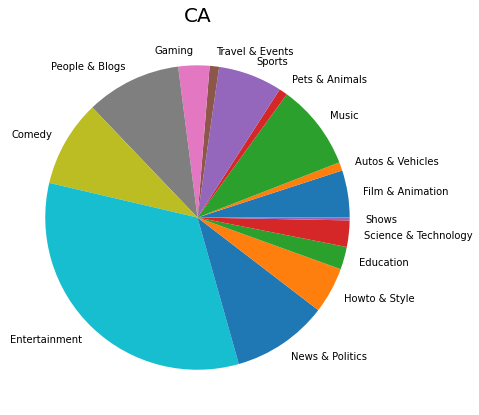

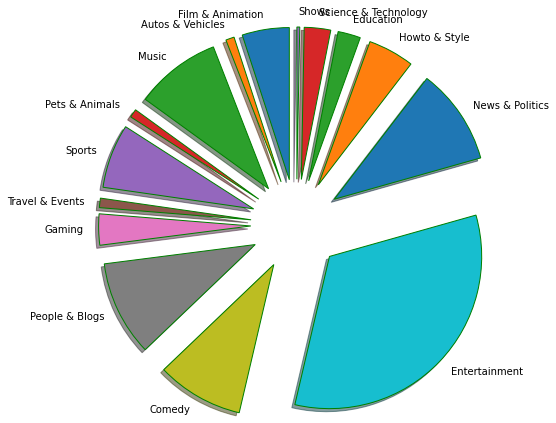

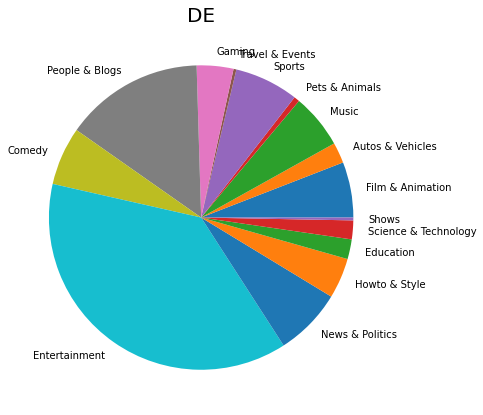

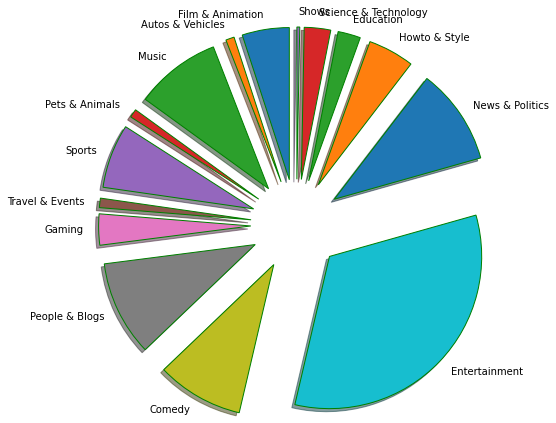

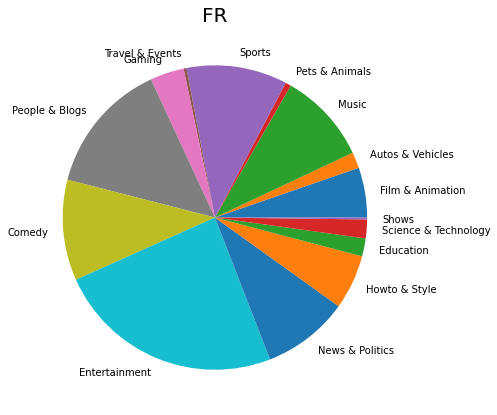

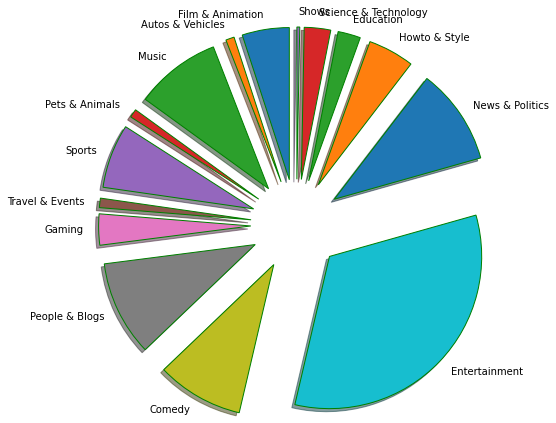

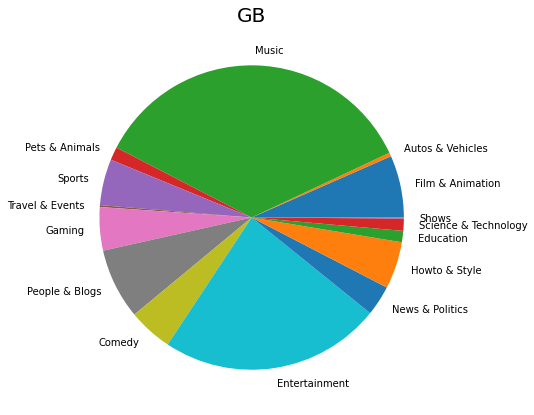

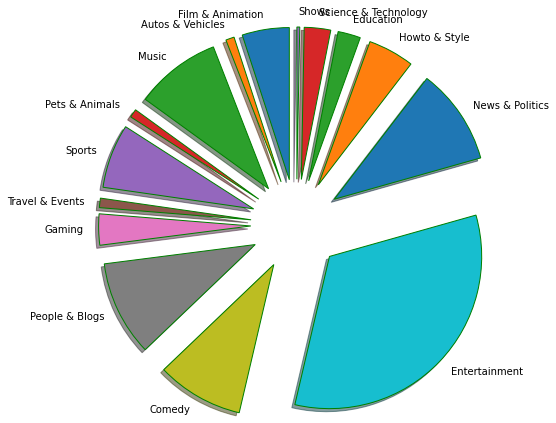

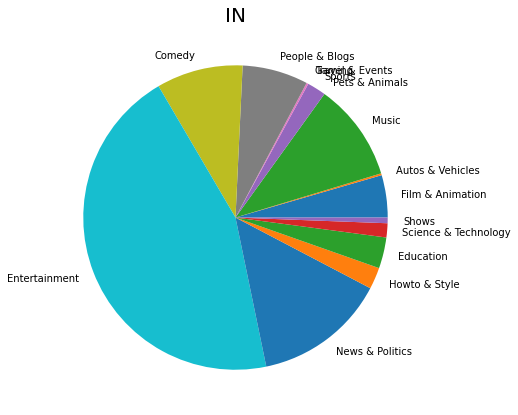

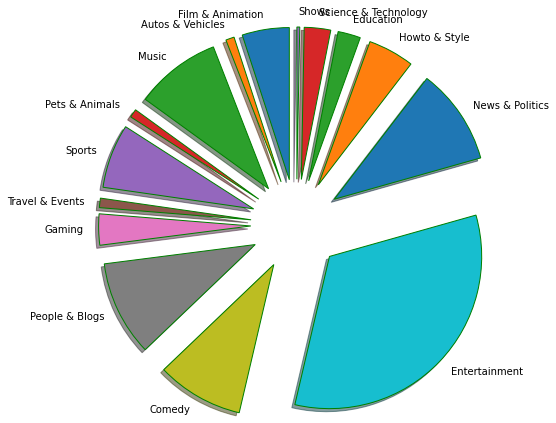

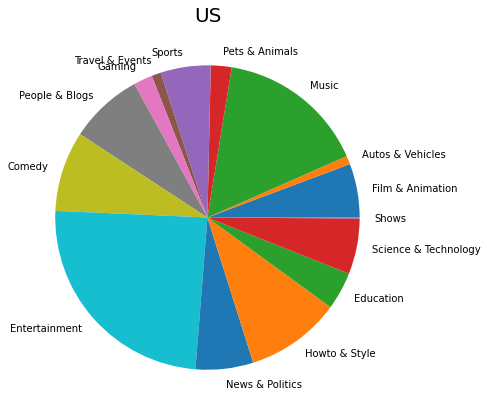

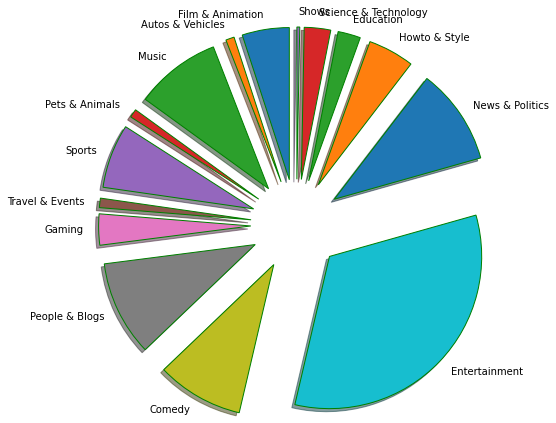

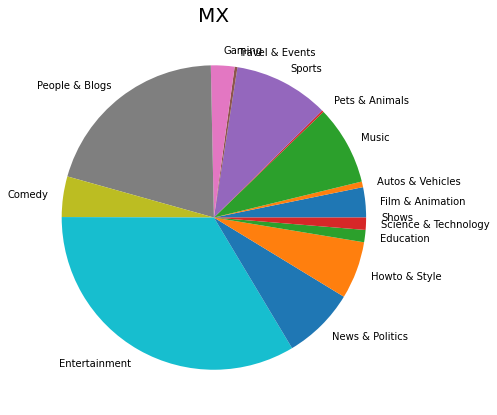

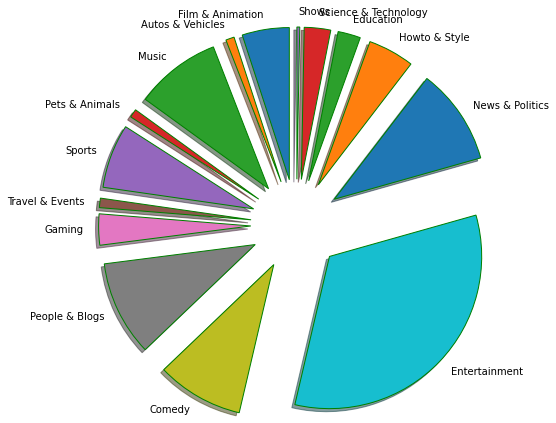

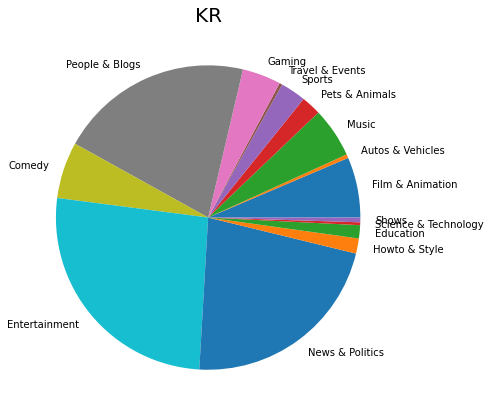

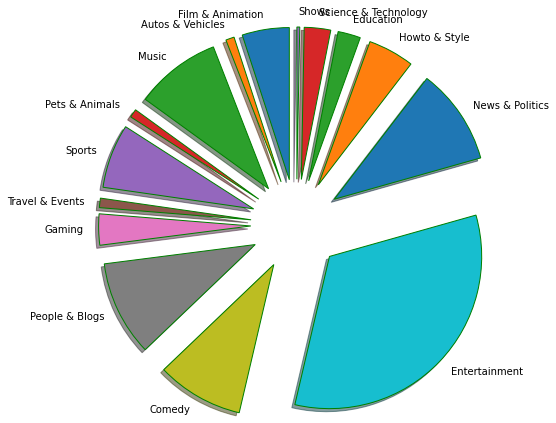

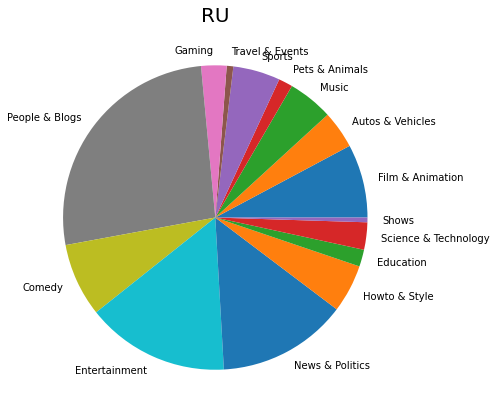

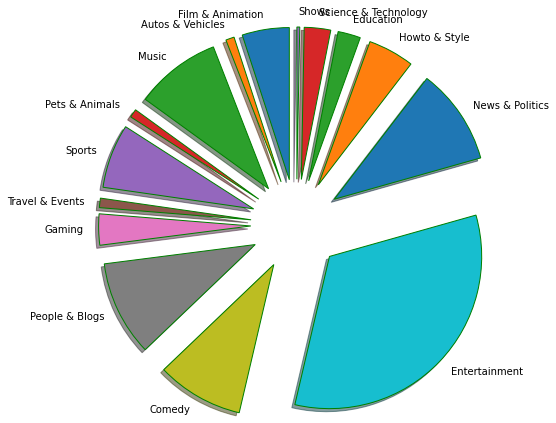

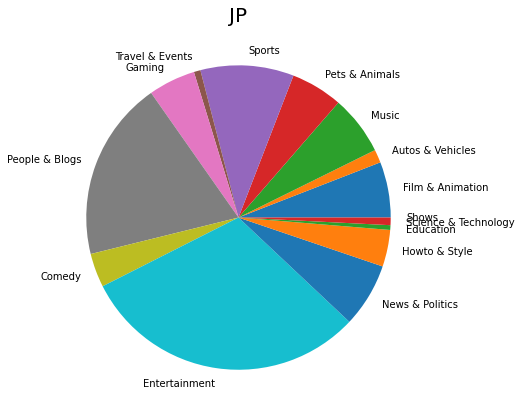

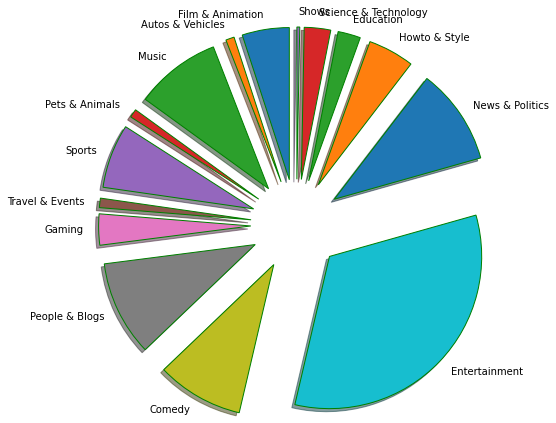

In [10]:


for country in countries:
    plt.fig = plt.figure(figsize =(14, 7)) 
    plt.fontsize = 36
    plt.pie(df_percentages[country], labels = df_percentages['category']) 
    plt.title(country, fontsize = 20)
    plt.savefig('pichart_'+country+'.png', dpi=300)
    plt.show()
    wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
    fig, ax = plt.subplots(figsize =(10, 7)) 
    explode = [0.3] * len(df_percentages.index) 

    wedges, autotexts = ax.pie(df_percentages['CA'],  
                                      explode = explode,
                                      labels = df_percentages['category'], 
                                      shadow = True, 
                                      startangle = 90,
                                      wedgeprops = wp, 
                                      textprops = dict(color ="black")

        )
#     ax.set_title('Canada', y=1.1)

Use this to analyze local/regional preferences e.g. North America, Europe, Asia, etc.

<h3> Likes/Dislikes/Comments Relation with Trending videos </h3>

Now we try to determine what effects, if any, do the number of likes, dislikes and comments have on trending videos.

<h5> What is the ratio of likes/dislikes? </h5>

To start with we try to see the ratio of likes/dislikes to understand what characterisitcs do Trending videos normally have?

In [11]:
df_combined_stats = pd.concat(list(dfs.values()))
df_combined_stats = df_combined_stats[['likes', 'dislikes', 'views', 'comment_count']]
df_combined_stats.fillna(int(0), inplace = True) # Remove Null
df_combined_stats.reset_index(inplace = True)
df_combined_stats.drop(['index'], axis = 1, inplace = True)
# df_combined_stats['dislikes'] = df_combined_stats['dislikes'].replace({0:1}) #Replace 0 dislikes with 1 so we dont get infinity

columns = ['likes', 'dislikes', 'views', 'comment_count']
for a, b in combinations(columns, 2):
    df_combined_stats[f'{a}_{b}'] = df_combined_stats[a].div(df_combined_stats[b])

for col in df_combined_stats.columns:
    df_combined_stats [col] = df_combined_stats[col].round(4)
    
# df_combined_stats = df_combined_stats[df_combined_stats.likes_dislikes < 600]
# df_combined_stats.fillna(0)





Text(0.5, 0, 'Likes/Dislikes')

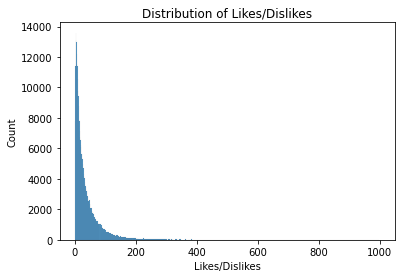

In [12]:
sns.histplot(data = df_combined_stats.loc[df_combined_stats['likes_dislikes'] < 1000], x = 'likes_dislikes')
# print(df_combined_stats['likes_dislikes'].mean())
plt.title("Distribution of Likes/Dislikes")
plt.xlabel("Likes/Dislikes")

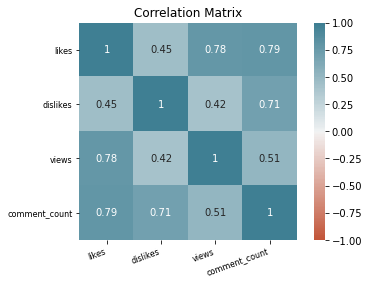

In [13]:
df_stat_comparison = df_combined_stats[['likes', 'dislikes', 'views', 'comment_count']]
corr = df_stat_comparison.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)

plt.title("Correlation Matrix")
ax.set_yticklabels(
    ax.get_yticklabels(),
#     horizontalalignment='right',
    rotation = 0,
    fontsize = 8
);
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=20,
    horizontalalignment='right',
    fontsize = 8
);
plt.savefig('heatmap.png', dpi=300)

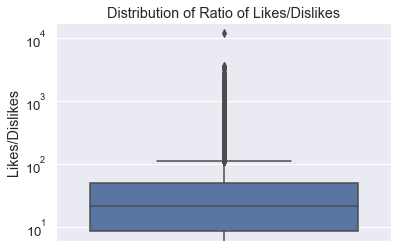

In [14]:
plt.figure()
sns.set(font_scale = 1.2)
s = sns.boxplot(data = df_combined_stats, y = 'likes_dislikes')
s.set(yscale = 'log')
plt.title("Distribution of Ratio of Likes/Dislikes")
plt.ylabel("Likes/Dislikes")
plt.savefig('Overall Like_Dislike.png', dpi=300)

The above given box and whisker plot helps us understand the distribution of the data as well as the extent of the outliers. As we can see, there are a large number of outliers, hence why our interquartile range is very small. This indicates that there is a high quantitiy of videos with very high likes to dislikes ratio. But the issue with this particular diagram is that it includes videos with high user interaction as well as minimal user interaction. So in order ot better understand the differences, we will divide the data into 2 seperate frames and then try to see their distributions.

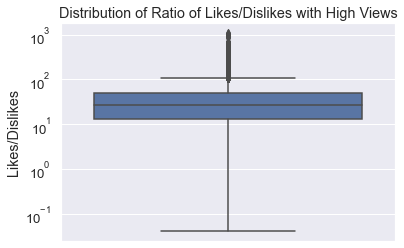

In [15]:
mean_views = df_combined_stats['views'].mean()
df_low_reaction = df_combined_stats[(df_combined_stats.views < mean_views)] # Views less than mean
df_high_reaction = df_combined_stats[(df_combined_stats.views > mean_views)] # Views greater than mean

sns.set(font_scale = 1.2)
s = sns.boxplot(data = df_high_reaction, y = 'likes_dislikes')
s.set(yscale = 'log')
plt.title("Distribution of Ratio of Likes/Dislikes with High Views")
plt.ylabel("Likes/Dislikes")
plt.savefig('High Views Like_Dislike.png', dpi=300)

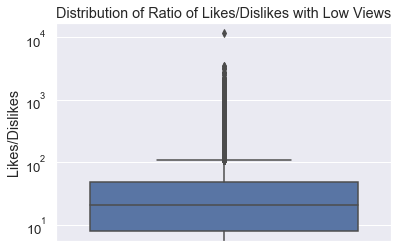

In [16]:
sns.set(font_scale = 1.2)
s = sns.boxplot(data = df_low_reaction, y = 'likes_dislikes')
s.set(yscale = 'log')
plt.title("Distribution of Ratio of Likes/Dislikes with Low Views")
plt.ylabel("Likes/Dislikes")
plt.savefig('Low views Like_Dislike.png', dpi=300)

<h4> Understanding regional preferences through likes and dislikes </h4>

Previouslt, while doing cross region analysis, we simply used the count of each category to decide which category is the most popular in each region. Now we try to delve a little deeper and udnerstand which category is the most liked in each region.


In [17]:

df_like_dislike_ratio = pd.DataFrame()
for country in countries:
    df_country = dfs[country]
    df_grpby_category = df_country.groupby('category_id').mean()
    df_grpby_category
    cols = ['likes', 'dislikes']
    for a, b in combinations(cols, 2):
        df_like_dislike_ratio[country] = df_grpby_category[a].div(df_grpby_category[b])
df_like_dislike_ratio.fillna(0, inplace = True)

cat_dict = category_dicts['US']
print(cat_dict)
cat_values = []
for i in list(df_like_dislike_ratio.index):
    cat_values.append(cat_dict[i])
df_like_dislike_ratio.insert(0, 'category', cat_values)
df_like_dislike_ratio.reset_index(inplace = True)
df_like_dislike_ratio.drop('category_id', inplace = True, axis = 1)
# df_like_dislike_ratio.drop(labels = ['Movies', 'Nonprofits & Activism'], inplace = True, axis = 0)
df_like_dislike_ratio = df_like_dislike_ratio[df_like_dislike_ratio.category != 'Movies']
df_like_dislike_ratio = df_like_dislike_ratio[df_like_dislike_ratio.category != 'Nonprofits & Activism']

df_like_dislike_ratio




{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 29: 'Nonprofits & Activism', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


,category,CA,DE,FR,GB,IN,US,MX,KR,RU,JP
0,Film & Animation,25.006598,24.299496,22.540890,23.804328,16.046409,27.324022,34.675591,26.194091,16.151416,20.056009
1,Autos & Vehicles,23.926634,33.624677,30.745637,12.602244,24.213382,17.471116,35.591902,11.631225,14.400419,13.626946
2,Music,25.542704,23.126124,28.377529,23.486149,16.920276,27.683979,28.528810,38.062457,14.887104,44.385172
3,Pets & Animals,47.732934,40.906896,29.948846,41.764667,55.877620,36.730135,15.546403,62.547037,18.798818,29.593136
4,Sports,18.089697,17.479436,20.487167,7.553389,25.045968,19.211110,24.124606,18.965445,16.229836,14.704795
5,Travel & Events,28.884068,29.080287,79.396539,26.753478,27.498377,14.206411,34.194530,11.409827,8.445960,4.585591
6,Gaming,21.139782,14.547186,20.504387,30.430404,19.635286,7.516853,25.582504,29.899366,18.300569,13.550708
7,People & Blogs,11.116004,13.406240,16.429559,11.280605,13.419862,18.317414,14.865101,21.359062,6.209397,10.549445
8,Comedy,36.490670,29.238260,38.571022,30.962429,24.957283,29.921860,23.024027,24.511517,9.779242,16.887780
9,Entertainment,15.014411,11.907757,11.422757,8.447381,14.442658,12.341134,16.760175,11.223136,10.433069,15.064427


<ipython-input-18-0ff1e307323a>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,20,40,60,80,100,120],  fontsize = 24)


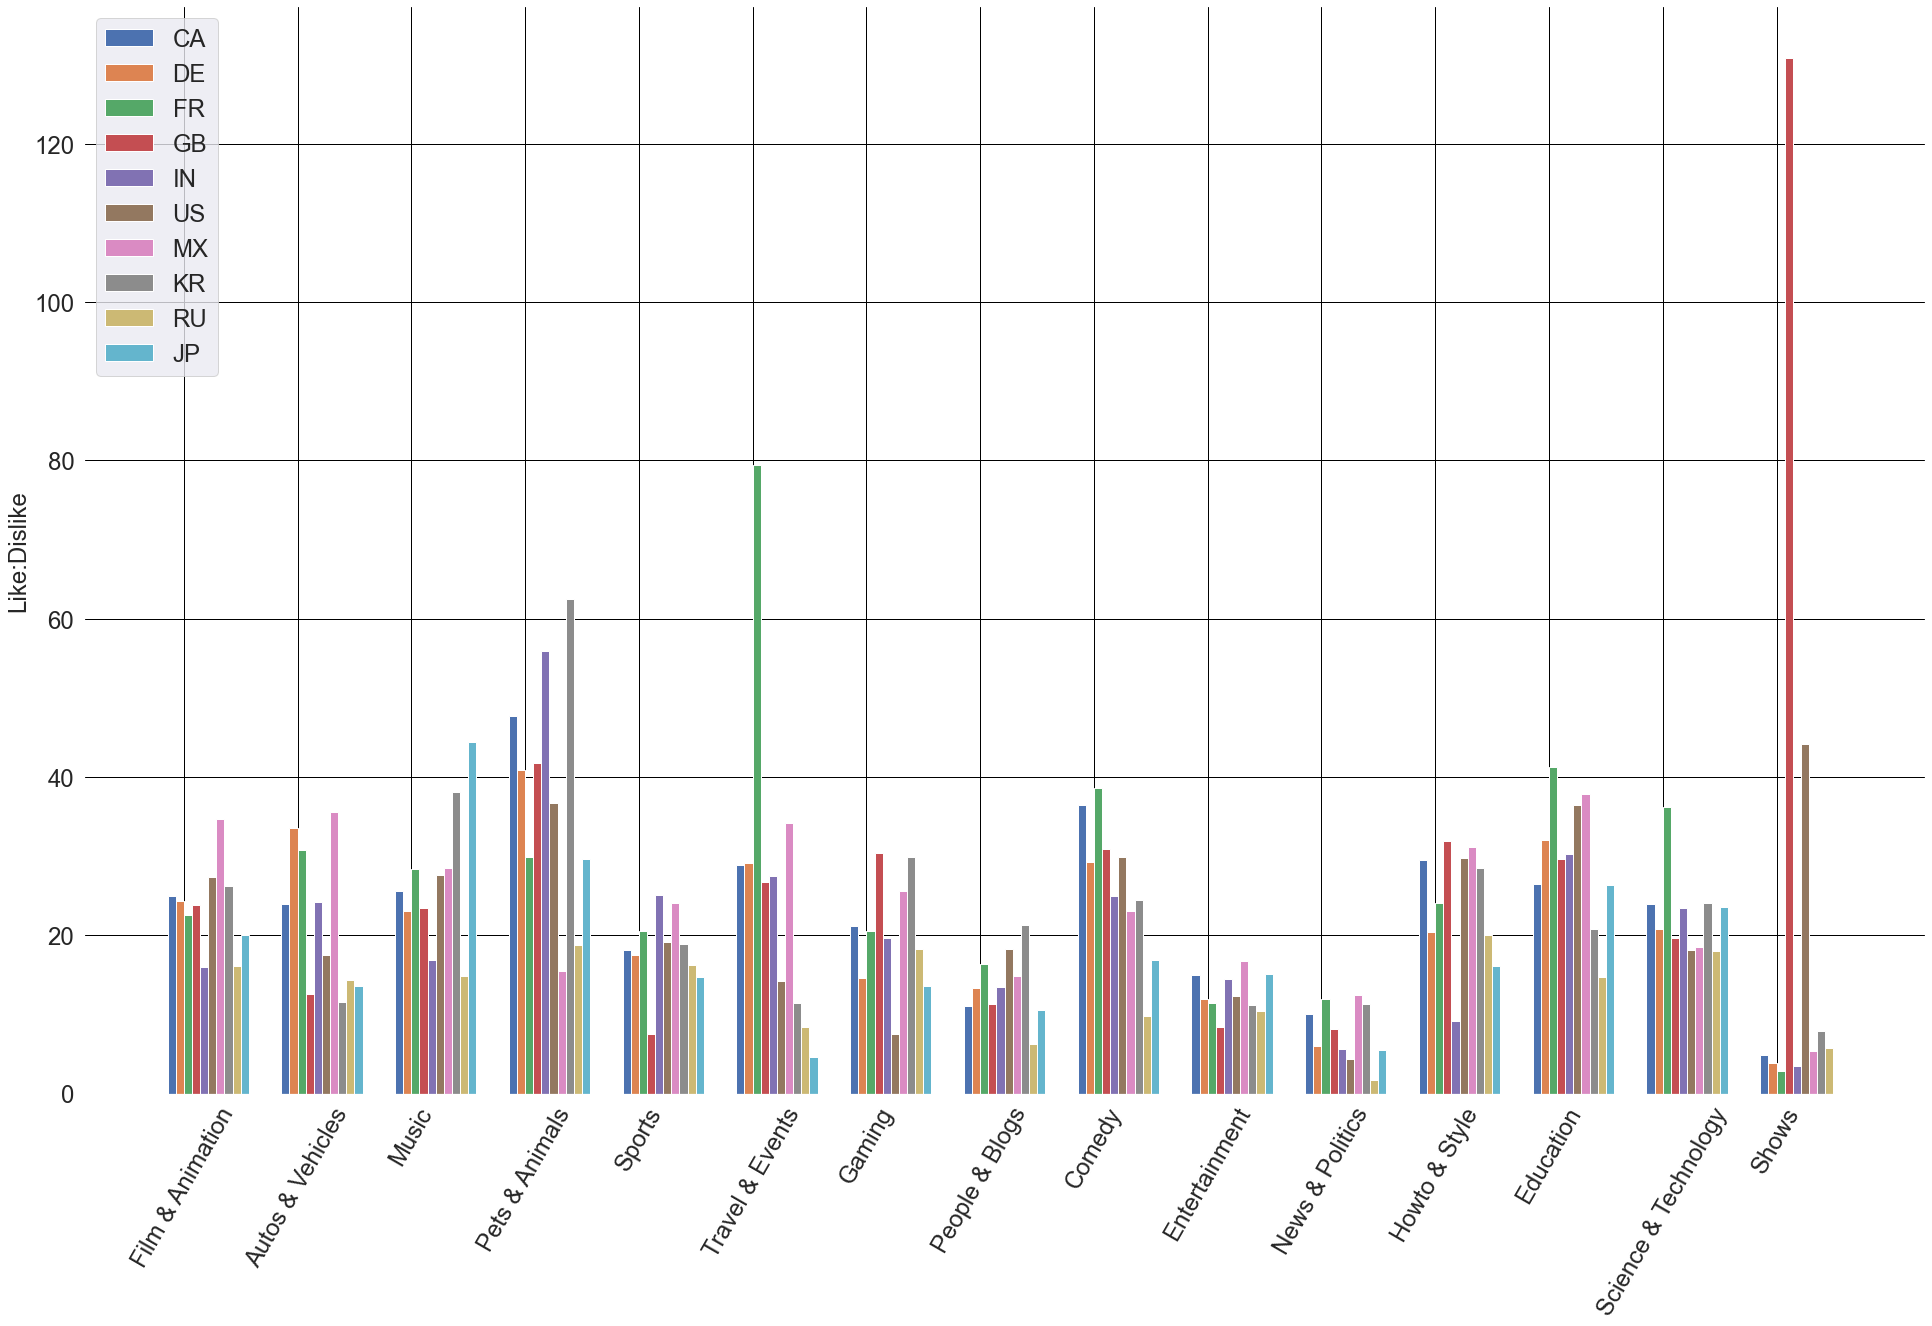

In [18]:
pos = []
width = 0.5
k = 7
for i in range(len(df_like_dislike_ratio['CA'])):
    pos.append(i*k)
fig, ax = plt.subplots(figsize=(33,20))

i = 0
for country in countries:
#     print(country)
#     print([p + width*i for p in pos])
    plt.bar([p + width*i for p in pos], df_like_dislike_ratio[country], width, alpha=1)
    i+=1

ax.set_ylabel('Like:Dislike', fontsize = 24)

ax.set_xticks([p + 1.5 * width for p in pos])

ax.set_xticklabels(df_like_dislike_ratio['category'], rotation = 60, fontsize = 24)
ax.set_yticklabels([0,20,40,60,80,100,120],  fontsize = 24)


plt.legend(countries, loc='upper left', fontsize = 24)
# ax = plt.gca()
ax.set_facecolor('white')
plt.savefig('tta.png', dpi = 300)
plt.grid(c = 'black')
plt.show()